In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.set_printoptions(suppress=True,  # 지수 표기법 억제 (예: 1e-10 대신 0.0000000001로 표시)
                    precision=8)    # 소수점 이하 자리수를 8자리로 표현

# 데이터 준비

In [19]:
# hitter1 = pd.read_csv('data/2000_2001_hitter.csv')
# hitter2 = pd.read_csv('data/2002_2013_hitter.csv')
# hitter3 = pd.read_csv('data/2014_hitter.csv')

hitter1 = pd.read_csv('https://raw.githubusercontent.com/JayoungKim-ai/ML_dataset/refs/heads/main/2000_2001_hitter.csv')
hitter2 = pd.read_csv('https://raw.githubusercontent.com/JayoungKim-ai/ML_dataset/refs/heads/main/2002_2013_hitter.csv')
hitter3 = pd.read_csv('https://raw.githubusercontent.com/JayoungKim-ai/ML_dataset/refs/heads/main/2014_hitter.csv')

print(f'hitter1 >>> {hitter1.shape}')
print(f'hitter2 >>> {hitter2.shape}')
print(f'hitter3 >>> {hitter3.shape}')

display(hitter1.head(3))
display(hitter2.head(3))
display(hitter3.head(3))

hitter1 >>> (89, 36)
hitter2 >>> (505, 39)
hitter3 >>> (55, 39)


,YrPlayer,Year,Rank,Player,Team,AVG,G,PA,AB,H,...,OBP,SLG,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR
0,2000박종호,2000,1,박종호,현대,0.340,121,541,441,150,...,0.428023,0.489796,0.917819,0.149660,0.297052,0.976667,100.354529,8.286154,0.400138,92.804
1,2000김동주,2000,2,김동주,두산,0.339,127,539,469,159,...,0.413729,0.603412,1.017141,0.264392,0.379531,1.063830,115.473840,9.306847,0.431993,105.000
2,2000브리또,2000,3,브리또,SK,0.338,103,452,405,137,...,0.398664,0.533333,0.931997,0.195062,0.274074,0.931655,86.204956,8.224501,0.400969,77.820


,YrPlayer,Year,Rank,Player,Team,AVG,G,PA,AB,R,...,MH,RISP,PH-BA,ISO,SECA,TA,RC,RC/27,wOBA,XR
0,2002장성호,2002,1,장성호,KIA,0.343,133,586,481,82,...,48,0.365,0.0,0.178794,0.365904,1.047904,116.003072,9.104892,0.412689,106.706
1,2002마해영,2002,2,마해영,삼성,0.323,133,596,532,92,...,53,0.313,0.0,0.268797,0.359023,1.002674,120.662819,8.573411,0.413068,110.578
2,2002이승엽,2002,3,이승엽,삼성,0.323,133,617,511,123,...,47,0.331,0.0,0.365949,0.538160,1.267409,157.375689,11.770481,0.468948,136.108


,YrPlayer,Year,Rank,Player,Team,AVG,G,PA,AB,R,...,MH,RISP,PH-BA,ISO,SECA,TA,RC,RC/27,wOBA,XR
0,2014서건창,2014,1,서건창,넥센,0.370,128,616,543,135,...,66,0.390,0.0,0.176796,0.342541,1.097222,139.001623,10.254218,0.424498,120.634
1,2014김태균,2014,2,김태균,한화,0.365,118,508,422,66,...,44,0.354,0.0,0.199052,0.360190,1.100694,110.631890,10.194748,0.441970,97.816
2,2014손아섭,2014,3,손아섭,롯데,0.362,122,570,483,105,...,54,0.336,0.0,0.175983,0.356108,1.106918,125.666667,10.603125,0.428663,110.456


In [20]:
# 데이터프레임 병합 
hitter_concat = pd.concat([hitter1, hitter2, hitter3], 
                          ignore_index=True) # 기존 인덱스 무시
hitter_concat.tail()

,YrPlayer,Year,Rank,Player,Team,AVG,G,PA,AB,H,...,TA,RC,RC/27,wOBA,XR,R,SAC,MH,RISP,PH-BA
644,2014이범호,2014,51,이범호,KIA,0.269,105,406,350,94,...,0.884328,64.894286,6.441712,0.369291,63.468,47.0,0.0,24.0,0.293,0.000
645,2014모창민,2014,52,모창민,NC,0.263,122,468,419,110,...,0.676647,53.028291,4.138046,0.319970,55.644,62.0,8.0,22.0,0.263,0.667
646,2014오지환,2014,53,오지환,LG,0.262,113,464,397,104,...,0.818182,64.147759,5.463689,0.336344,63.404,72.0,6.0,21.0,0.359,0.000
647,2014조동화,2014,54,조동화,SK,0.262,125,522,443,116,...,0.539359,48.898621,3.520701,0.293759,48.544,74.0,28.0,26.0,0.328,0.143
648,2014김재호,2014,55,김재호,두산,0.252,122,421,341,86,...,0.620818,41.969406,3.867488,0.304498,44.468,50.0,13.0,21.0,0.298,0.000


In [21]:
# 변수 선택
X = hitter_concat[['OPS','ISO','SECA','TA','RC','RC/27','wOBA','XR']]
y = hitter_concat['YrPlayer']

print(X.shape, y.shape)
display(X.head())
display(y.head())


(649, 8) (649,)


,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR
0,0.917819,0.149660,0.297052,0.976667,100.354529,8.286154,0.400138,92.804
1,1.017141,0.264392,0.379531,1.063830,115.473840,9.306847,0.431993,105.000
2,0.931997,0.195062,0.274074,0.931655,86.204956,8.224501,0.400969,77.820
3,1.031229,0.284188,0.423077,1.110092,119.916981,9.811389,0.436688,107.594
4,0.932665,0.231504,0.324582,0.923588,82.605677,7.125729,0.394586,80.284


0     2000박종호 
1     2000김동주 
2     2000브리또 
3     2000송지만 
4    2000데이비스 
Name: YrPlayer, dtype: object

<Axes: >

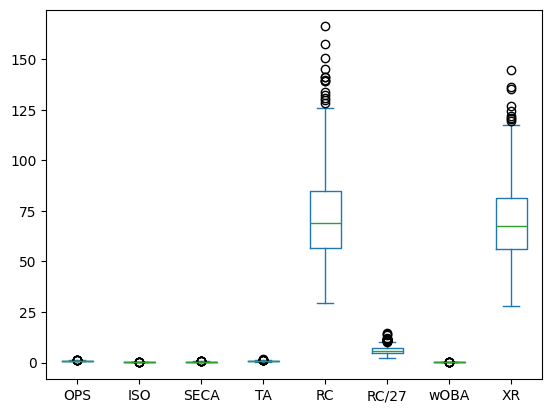

In [22]:
# 데이터 분포 확인
X.plot(kind='box')

In [23]:
# 데이터 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X.loc[:,:] = scaler.fit_transform(X)
X.head()

,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR
0,0.976149,-0.074229,0.104176,1.108646,1.248725,1.204841,1.118807,1.214334
1,1.897116,1.679891,1.054165,1.654227,1.929967,1.758231,1.894866,1.857449
2,1.107616,0.619910,-0.160485,0.826902,0.611178,1.171415,1.139040,0.424202
3,2.027750,1.982543,1.555727,1.943794,2.130165,2.031780,2.009248,1.994235
4,1.113814,1.177062,0.421269,0.776410,0.449003,0.575692,0.983538,0.554133


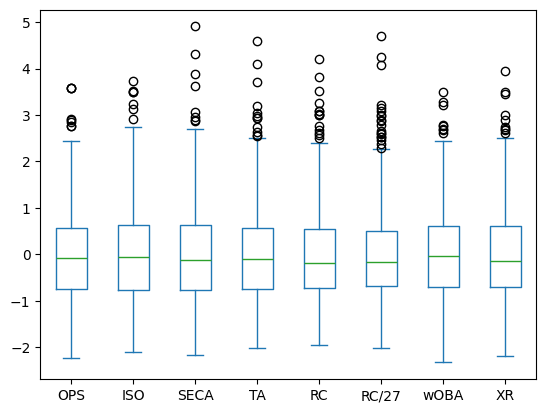

In [24]:
X.plot(kind='box');

# k-means clustering

### 최적의 k 찾기

[2225.7814969700885, 1334.9614684794224, 1025.562124874354, 867.7748463788824, 738.152665444155]


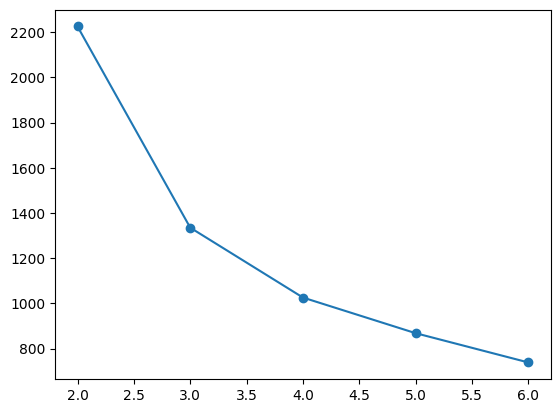

In [25]:
# 엘보우 기법으로 최적의 k 찾기
from sklearn.cluster import KMeans
 
# inertia_: 각 데이터 포인트와 그 데이터가 속한 군집의 중심점 사이의 거리 제곱합
inerita = []
for i in range(2,7):
    km = KMeans(i)
    km.fit(X)
    inerita.append(km.inertia_)
 
print(inerita)
 
# 이너셔 시각화
plt.plot(range(2,7), inerita, marker='o');

#### K-Means 군집화

C:\Users\USER\AppData\Local\Temp\ipykernel_1644\1144521727.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['kmeans_cluster'] = kmeans_cluster


,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR,kmeans_cluster
0,0.976149,-0.074229,0.104176,1.108646,1.248725,1.204841,1.118807,1.214334,1
1,1.897116,1.679891,1.054165,1.654227,1.929967,1.758231,1.894866,1.857449,0
2,1.107616,0.619910,-0.160485,0.826902,0.611178,1.171415,1.139040,0.424202,1


C:\Users\USER\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44400 (\N{HANGUL SYLLABLE GUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51665 (\N{HANGUL SYLLABLE JIB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44284 

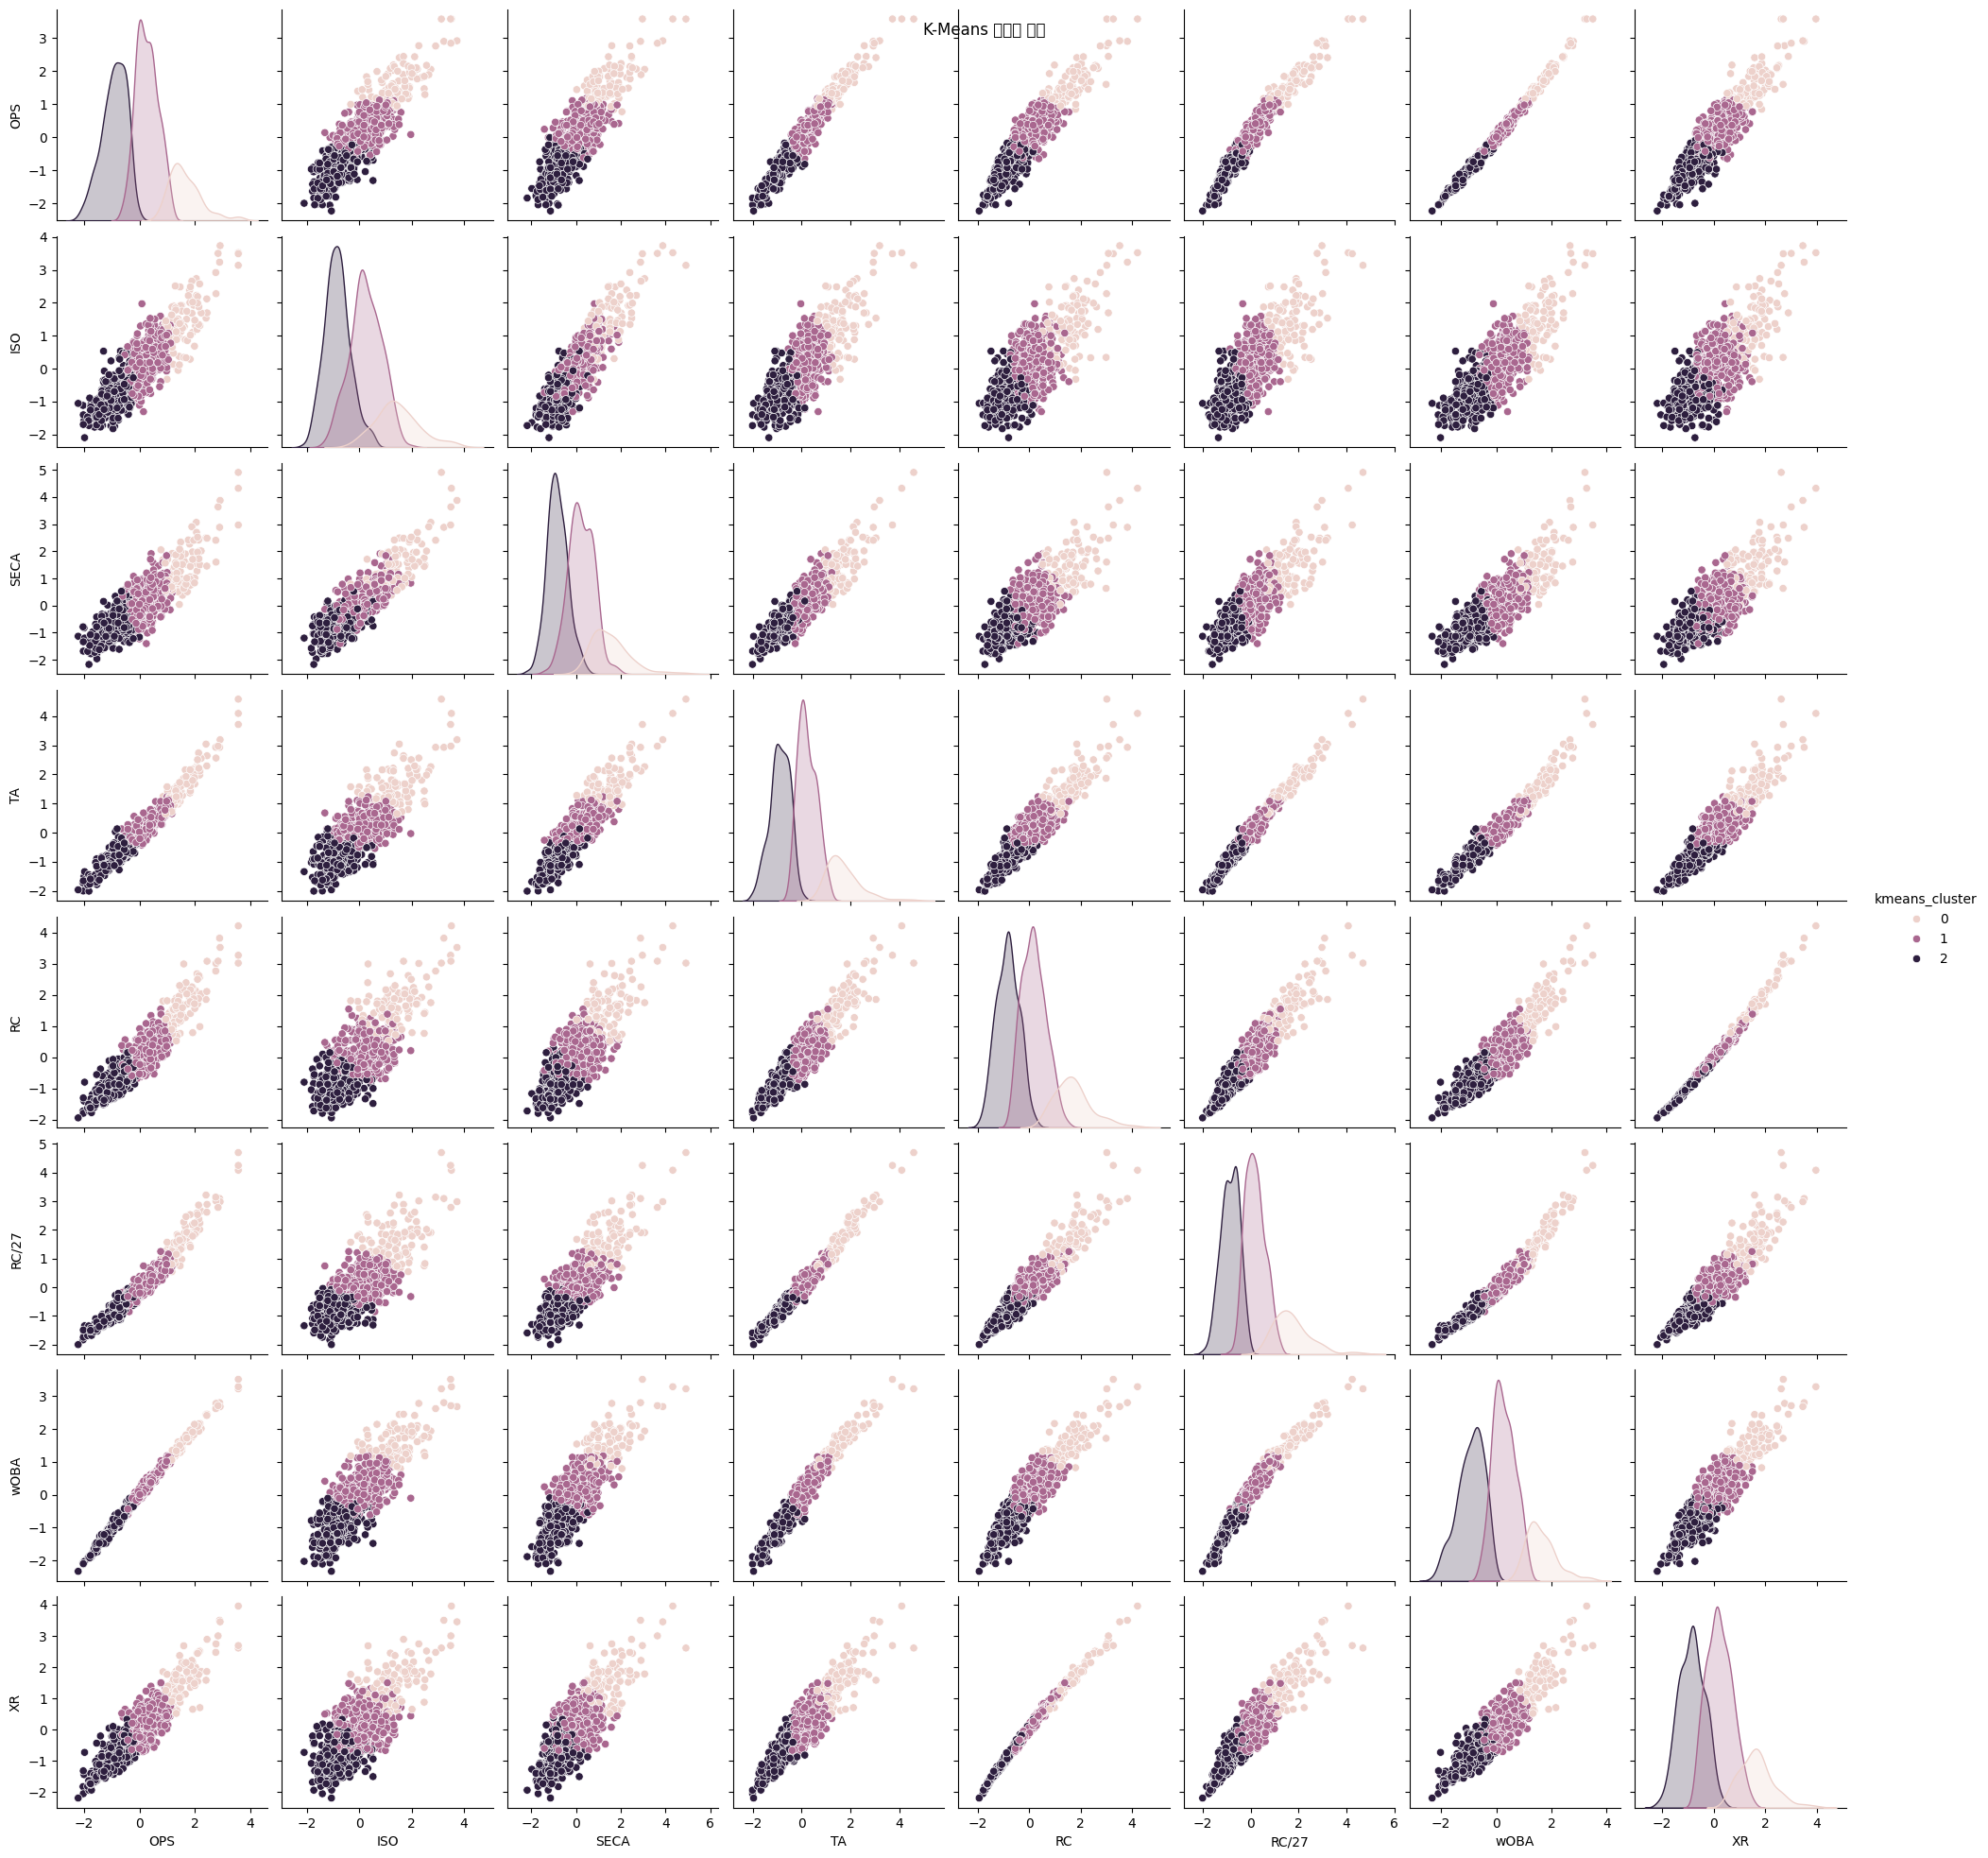

In [48]:
# 클러스터링 객체 생성
km = KMeans(n_clusters=3, random_state=42)
# km = KMeans(random_state=42)

# 학습 및 클러스터링 결과 예측
kmeans_cluster = km.fit_predict(X)
X['kmeans_cluster'] = kmeans_cluster
display(X.head(3))

# 군집 중심점
# km.cluster_centers_

# 군집화 결과 시각화
sns.pairplot(data=X, hue='kmeans_cluster')
plt.suptitle('K-Means 군집화 결과')

plt.show()

### 군집화

실루엣 점수:0.4295317550526677


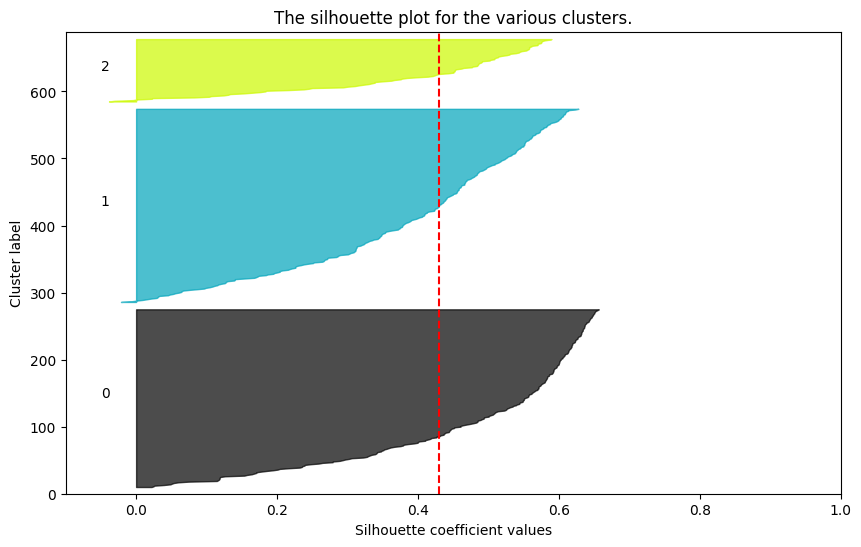

In [29]:
k =3
# k-means clustering
from sklearn.cluster import KMeans
km =KMeans(n_clusters=k, random_state=10)
kmeans_cluster=km.fit_predict(X)
 # 실루엣 점수
from sklearn.metrics import silhouette_score
print(f'실루엣 점수:{silhouette_score(X, kmeans_cluster)}')
 # 실루엣 시각화
import silhouette_analysis as s
s.silhouette_plot(X, k)

실루엣 점수:0.3686437769255018


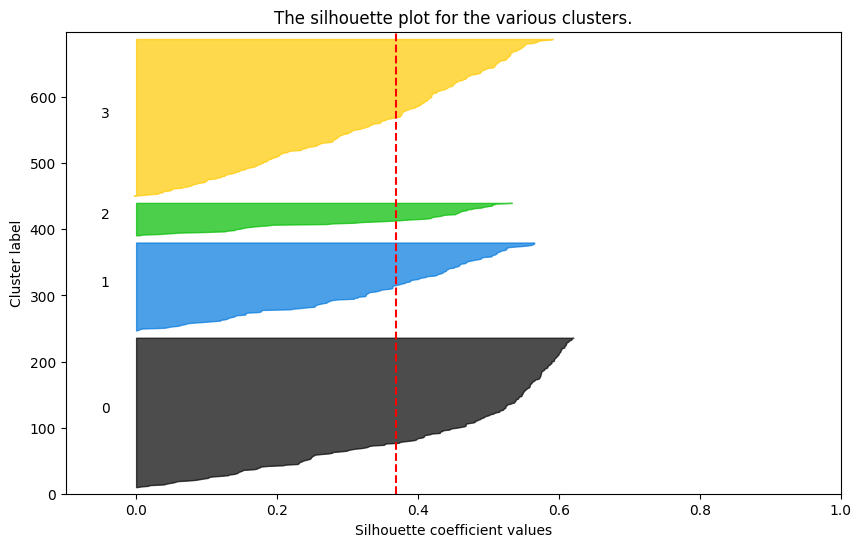

In [30]:
k =4
# k-means clustering
from sklearn.cluster import KMeans
km =KMeans(n_clusters=k, random_state=10)
kmeans_cluster=km.fit_predict(X)
 # 실루엣 점수
from sklearn.metrics import silhouette_score
print(f'실루엣 점수:{silhouette_score(X, kmeans_cluster)}')
 # 실루엣 시각화
import silhouette_analysis as s
s.silhouette_plot(X, k)

### 군집화 결과 분석

In [31]:
# 데이터프레임 생성
df = pd.DataFrame(X, columns=X.columns)
df['kmeans_cluster'] = kmeans_cluster
df.head()

,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR,kmeans_cluster
0,0.976149,-0.074229,0.104176,1.108646,1.248725,1.204841,1.118807,1.214334,1
1,1.897116,1.679891,1.054165,1.654227,1.929967,1.758231,1.894866,1.857449,2
2,1.107616,0.619910,-0.160485,0.826902,0.611178,1.171415,1.139040,0.424202,1
3,2.027750,1.982543,1.555727,1.943794,2.130165,2.031780,2.009248,1.994235,2
4,1.113814,1.177062,0.421269,0.776410,0.449003,0.575692,0.983538,0.554133,1


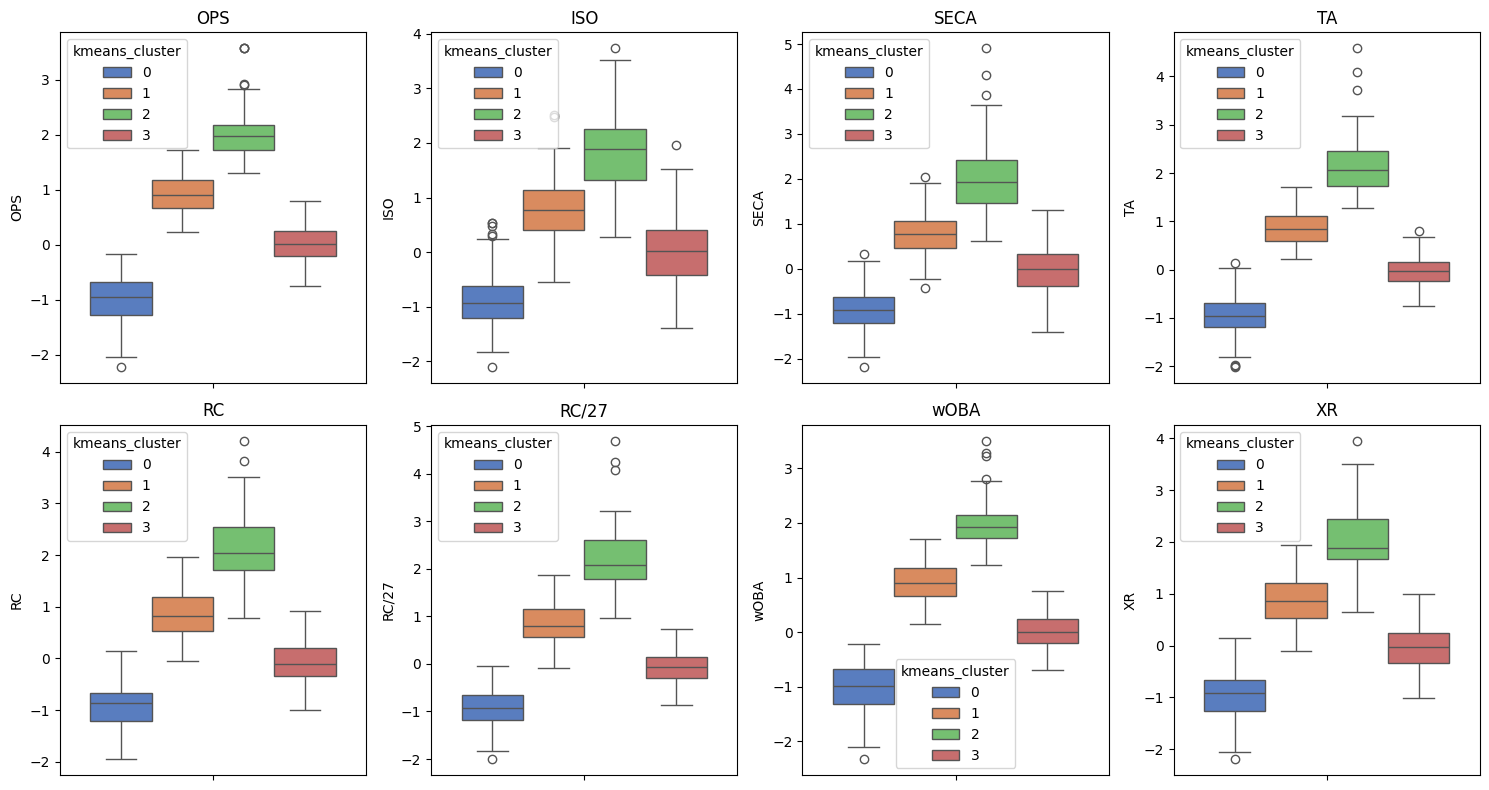

In [35]:
# 군집의 데이터 특징 분석
cols =df.columns[:-1]
plt.figure(figsize=(15,8))
for i, col in enumerate(cols):
    plt.subplot(2,4,i+1)  #inumalate는 1부터 시작하니까 i+1
    sns.boxplot(data=df, y=col, hue='kmeans_cluster', palette='muted') #boxplot경우 x를 넣으면 누워진게 그려져져
    plt.title(col)
plt.tight_layout()

In [38]:
# 개별 데이터 실루엣 계수 컬럼 추가
from sklearn.metrics import silhouette_samples
df['silhouette'] = silhouette_samples(X, kmeans_cluster)
df.head(3)

,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR,kmeans_cluster,silhouette
0,0.976149,-0.074229,0.104176,1.108646,1.248725,1.204841,1.118807,1.214334,1,0.433784
1,1.897116,1.679891,1.054165,1.654227,1.929967,1.758231,1.894866,1.857449,2,0.278949
2,1.107616,0.619910,-0.160485,0.826902,0.611178,1.171415,1.139040,0.424202,1,0.365366


In [39]:
# 잘못 군집화 된 클러스터
df.loc[df['silhouette']<0]

,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR,kmeans_cluster,silhouette
106,-0.487238,-0.525068,-0.672578,-0.639331,-0.228069,-0.50102,-0.465956,-0.251185,3,-0.003318


In [57]:
# 클러스터 별 중심 player
df['player'] =y # player 컬럼 추가
max_idx=df.groupby('kmeans_cluster')['silhouette'].idxmax()
df.loc[max_idx,['player','kmeans_cluster']]

,player,kmeans_cluster
325,2007김민재,0
475,2011최정,1
553,2013박병호,2
192,2004박진만,3


In [62]:
df['rank']=df.groupby('kmeans_cluster')['silhouette'].rank('dense')
df.loc[df['rank']<=3]

,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR,kmeans_cluster,silhouette,player,pca_cluster,rank
106,-0.487238,-0.525068,-0.672578,-0.639331,-0.228069,-0.501020,-0.465956,-0.251185,3,-0.003318,2002강동우,0,1.0
247,-0.579964,0.092560,-0.508001,-0.753638,-0.284957,-0.712661,-0.727330,-0.332497,0,0.007008,2005라이온,0,2.0
308,1.497092,1.128243,1.968384,1.604595,1.494498,1.449024,1.476601,1.569007,2,0.008110,2007브룸바,3,2.0
345,0.300930,-0.277513,-0.126136,0.667886,0.810153,0.672225,0.298565,0.896256,1,0.003524,2008조성환,2,2.0
356,-0.765416,-1.561188,-0.425195,-0.159304,-0.058171,-0.215734,-0.657398,0.002138,0,0.017471,2008이종욱,0,3.0
414,0.421473,1.134192,0.659796,0.245733,0.328596,0.103963,0.330268,0.391614,1,0.000078,2009박정권,2,1.0
463,0.384383,1.525750,0.803392,0.113496,0.231924,-0.176452,0.302820,0.398997,3,0.019589,2010최진행,2,3.0
508,-0.431603,-1.116144,-1.325089,-0.603810,0.144438,-0.229039,-0.428757,0.145146,0,0.001266,2012손아섭,0,1.0
522,1.311640,1.777687,1.864598,1.434561,1.643943,1.212194,1.238435,1.759474,2,0.004794,2012박병호,3,1.0
612,0.467836,-0.002966,-0.117825,0.283424,0.836296,0.462494,0.527210,0.821377,1,0.004712,2014황재균,2,3.0


# 주성분분석

In [43]:
# 모든 특성(컬럼)에 대해 주성분 계산하여 각 데이터포인트를 주성분 공간으로 변환
from sklearn.decomposition import PCA
pca=PCA()
principal_components=pca.fit_transform(X)
principal_components

array([[ 2.48864775, -1.29871071, -0.18369185, ...,  0.11512947,
        -0.05012084, -0.00542238],
       [ 4.8638416 , -0.32843484,  0.04378699, ...,  0.02815584,
        -0.05298553,  0.00816747],
       [ 2.05850718, -0.4397998 , -0.79470761, ...,  0.02887054,
        -0.04552095, -0.02742987],
       ...,
       [-0.3971905 ,  0.69084294,  0.14211226, ...,  0.09606087,
        -0.0169874 ,  0.04994242],
       [-3.94087277, -0.42488303,  0.27501545, ..., -0.11415355,
         0.00769498,  0.00666951],
       [-3.33227219,  0.22550401, -0.14325161, ..., -0.0513692 ,
         0.01871363, -0.02078552]], shape=(649, 8))

In [44]:
# 컬럼별 설명된 분산 비율 확인
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.90514573, 0.05062617, 0.02188854, 0.0184561 , 0.00299299,
       0.00055624, 0.00018392, 0.00015031])

In [45]:
# 누적분산 확인/ 컬럼별 설명된 분산 비율율
cumulative_variance=explained_variance.cumsum()
cumulative_variance

#pca.explained_variance_ratio_.cumsum
#2개를 선택하는게 아니라 2개로 압축한다.

array([0.90514573, 0.95577189, 0.97766044, 0.99611654, 0.99910953,
       0.99966577, 0.99984969, 1.        ])

In [63]:
# 누적분산 확인
#pca.explained_variance_ratio_.cumsum
#2개를 선택하는게 아니라 2개로 압축한다.
pca.explained_variance_ratio_

array([0.90039213, 0.04770525])

In [50]:
# 2개의 주성분 추출
from sklearn.decomposition import PCA
pca = PCA(n_components=2) 
principal_components = pca.fit_transform(X)
principal_components

array([[ 2.47767875, -1.3071801 ],
       [ 5.02042238, -0.32699001],
       [ 2.05972207, -0.44520747],
       ...,
       [-0.32927372,  0.69812764],
       [-4.00824412, -0.41911796],
       [-3.41624001,  0.22689701]], shape=(649, 2))

실루엣 점수:0.44556606459344233


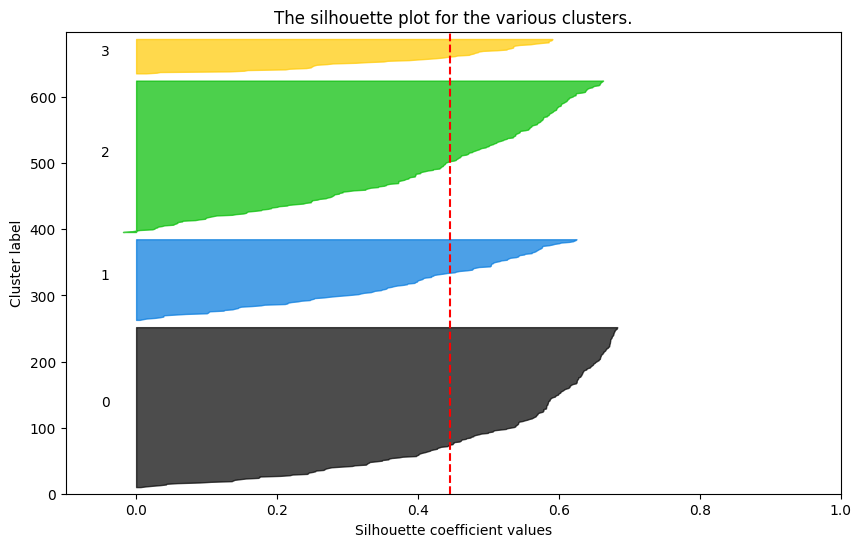

In [51]:
# 주성분으로 군집화
k =4
 # k-means clustering
from sklearn.cluster import KMeans
km =KMeans(n_clusters=k, random_state=10)
pca_cluster=km.fit_predict(principal_components)
 # 실루엣 점수
from sklearn.metrics import silhouette_score
print(f'실루엣 점수:{silhouette_score(principal_components, pca_cluster)}')
 # 실루엣 시각화
import silhouette_analysis as s
s.silhouette_plot(principal_components, k)

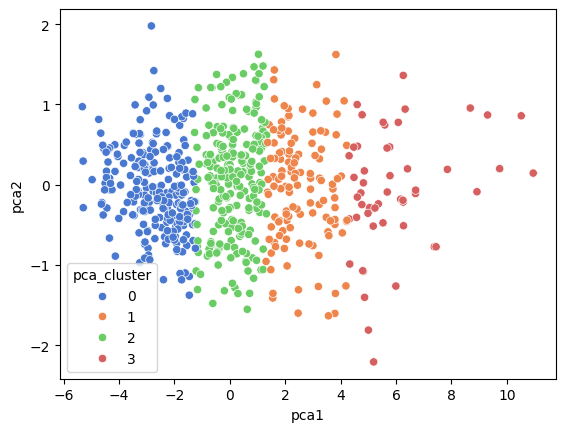

In [52]:
# 군집 결과 시각화
df_pca=pd.DataFrame(principal_components,
columns=['pca1','pca2'])
df_pca['pca_cluster'] =pca_cluster
sns.scatterplot(data=df_pca, x='pca1', y='pca2', 
hue='pca_cluster', palette='muted');

# PCA를 하거나 하지 않은 경우 군집 결과 비교

In [54]:
# pca_cluster 컬럼 추가
df['pca_cluster'] = pca_cluster
df.head()

,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR,kmeans_cluster,silhouette,player,pca_cluster
0,0.976149,-0.074229,0.104176,1.108646,1.248725,1.204841,1.118807,1.214334,1,0.433784,2000박종호,1
1,1.897116,1.679891,1.054165,1.654227,1.929967,1.758231,1.894866,1.857449,2,0.278949,2000김동주,3
2,1.107616,0.619910,-0.160485,0.826902,0.611178,1.171415,1.139040,0.424202,1,0.365366,2000브리또,1
3,2.027750,1.982543,1.555727,1.943794,2.130165,2.031780,2.009248,1.994235,2,0.469111,2000송지만,3
4,1.113814,1.177062,0.421269,0.776410,0.449003,0.575692,0.983538,0.554133,1,0.430869,2000데이비스,1


In [56]:
df[['kmeans_cluster','pca_cluster']].value_counts()

kmeans_cluster  pca_cluster
0               0              227
3               2              222
1               1              123
2               3               50
3               0               16
1               2                8
                3                3
Name: count, dtype: int64